In [1]:
using PGFPlots
using StaticArrays
using Interpolations
push!(LOAD_PATH, "/home/kylebrown/.julia/v0.6/Roadways/src/")
using splines

# Test different methods of spline resampling based on curvature and projection error

In [2]:
# Generate curve for projection
α = collect(linspace(0,2*π,20))
r = collect(linspace(100,10,20))
x = r.*cos.(α)
y = r.*sin.(α);

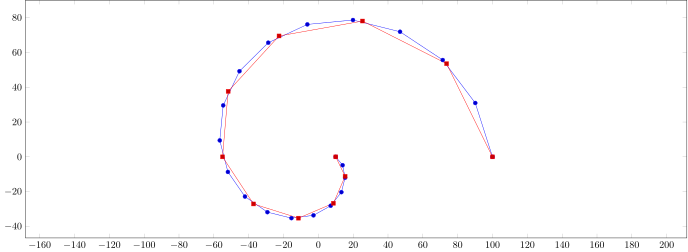

In [3]:
# B-Spline Interpolation
T = linspace(0,1,length(x))
itp = scale(interpolate(hcat(x,y), (BSpline(Cubic(Natural())), NoInterp()), OnGrid()), T, 1:2)
tfine = collect(0:0.1:1)
xs, ys = [itp[t,1] for t in tfine], [itp[t,2] for t in tfine]
Axis([
        Plots.Linear(x,y),
        Plots.Linear(xs,ys)
        ], axisEqual=true, width="25cm", height="10cm")

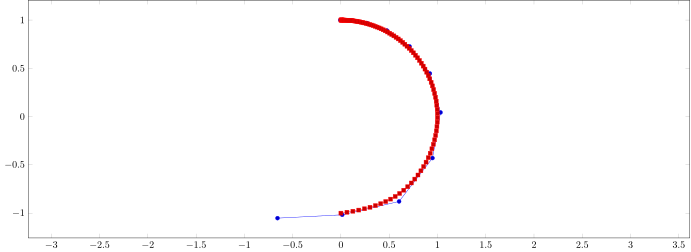

In [14]:
t = linspace(0,1,11)
x = sin.(π*t.^2)
y = cos.(π*t.^2)
spline = scale(interpolate(hcat(x,y), (BSpline(Cubic(Natural())), NoInterp()), OnCell()), t, 1:2)
tfine = collect(0:0.01:1)
xs, ys = [spline[t,1] for t in tfine], [spline[t,2] for t in tfine]
knots = [t[1];t;t[end]]
Axis([
        Plots.Linear(spline.itp.coefs[:,1],spline.itp.coefs[:,2]),
        Plots.Linear(xs,ys),
        ], axisEqual=true, width="25cm", height="10cm")

In [15]:
b_spline = CubicBasisSpline(spline.itp.coefs, knots)
cubic_spline = convert_basis_to_hermite_spline(b_spline);

In [16]:
b_spline.knots

13-element Array{Float64,1}:
 0.0
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
 1.0

In [17]:
b_spline.control_pts

13×2 Array{Float64,2}:
 -0.00297385   0.998827 
 -0.00406242   1.00024  
  0.0192235    1.00022  
  0.115633     0.995918 
  0.270244     0.968797 
  0.477337     0.890657 
  0.71093      0.726414 
  0.921584     0.446326 
  1.0317       0.0429565
  0.948671    -0.429688 
  0.602582    -0.878882 
  0.0134997   -1.01727  
 -0.656581    -1.05205  

In [23]:
t_sample = 0.45
@show sample_spline(b_spline, t_sample)
@show sample_spline(cubic_spline, t_sample)
@show [spline[t_sample,i] for i in 1:size(spline)[2]];

sample_spline(b_spline, t_sample) = [0.594208, 0.804329]
sample_spline(cubic_spline, t_sample) = [0.594208, 0.804329]
[spline[t_sample, i] for i = 1:(size(spline))[2]] = [0.594208, 0.804329]


In [ ]:
collect(spline.ranges[1])

In [ ]:
clamp(1.3, 0.0, 1.25)